In [8]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import os
import glob
%matplotlib inline

In [38]:
# Load the data from the KL computations
data_path = "/home/brad/DailyLog/20171102/X103_KL_divs_B1056_parameter_sweep.pkl"
with open(data_path, "rb") as f:
    data_and_params = pickle.load(f)

In [52]:
KL_div_full = data_and_params[0]
betas = data_and_params[1]
dims = data_and_params[2]
stims = data_and_params[3]
Ntrials = data_and_params[4]

# KL_div_full is Nstim x Nstim x Ntrials^2 x Ndims x Nbetas
# average over trials!
KL_div_trialavg = np.mean(KL_div_full, axis = 2)

KL_div_alltrial = np.reshape(KL_div_full[:, :, :, 0, 0], (len(stims)*Ntrials, len(stims*Ntrials),1))

# Symmetrize
# Now it's Nstim x Nstim x Ndims x Nbetas
KL_div_trialavg_sym = (KL_div_trialavg + np.transpose(KL_div_trialavg, axes=(1,0,2,3)))/2

# Symmetrize alltrial
KL_div_alltrial_sym = (KL_div_alltrial + np.transpose(KL_div_alltrial, axes=(1,0,2)))/2

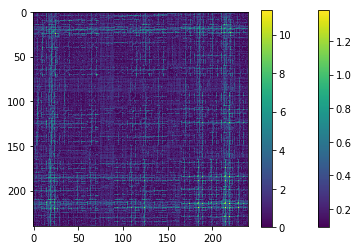

In [53]:
# show the matrix
plt.imshow(KL_div_trialavg_sym[:, :, 0, -1])
plt.colorbar()

# show the matrix
plt.imshow(KL_div_alltrial_sym[:, :, 0])
plt.colorbar()

In [47]:
KL_div_alltrial.shape

(240, 240, 1)

In [41]:
-

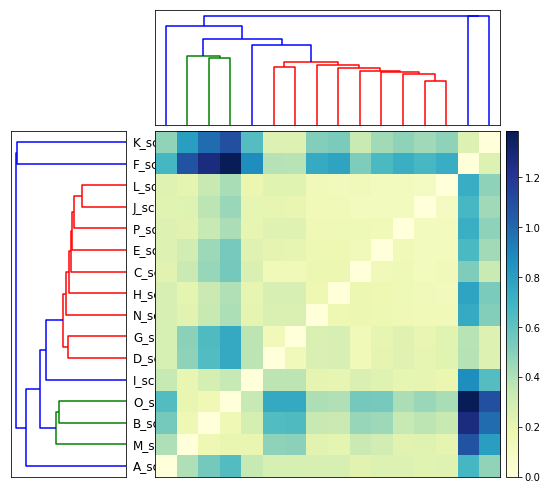

In [45]:
pyslsa_HC(KL_div_trialavg_sym[:, :, 0, -1], stims)

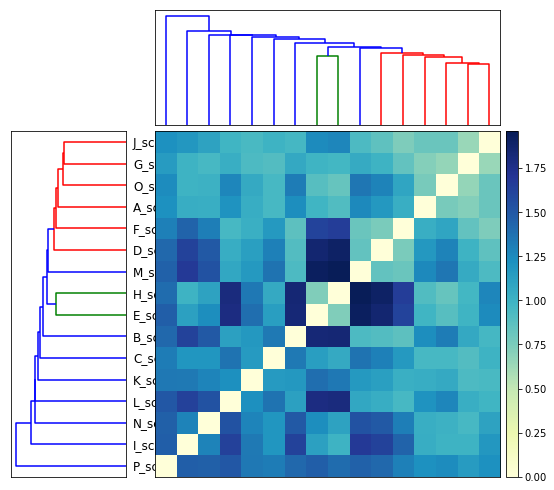

In [35]:
pyslsa_HC(KL_div_trialavg_sym[:, :, 0, 0], stims)

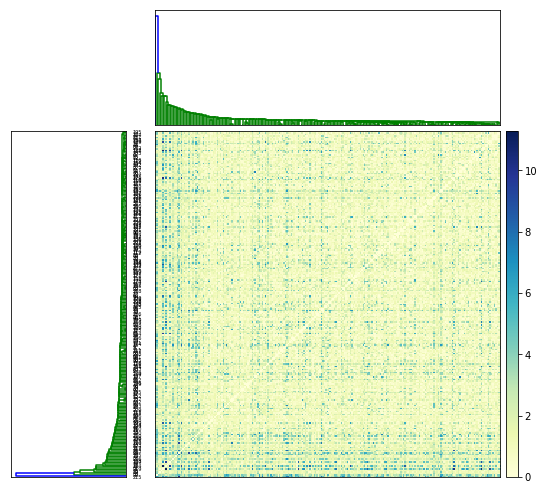

In [55]:
pyslsa_HC(KL_div_alltrial_sym[:, :, 0], range(240))